In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../TensorFlow_FILES/DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


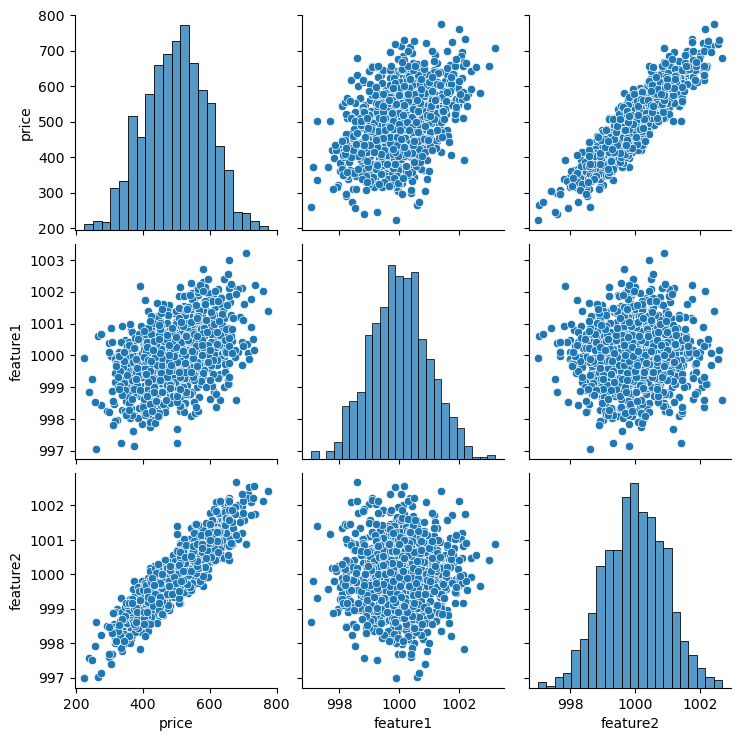

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:

X = df[['feature1', 'feature2']].values
y = df['price'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train.shape

(700, 2)

In [8]:
X_test.shape

(300, 2)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train = scaler.transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
X_train.max()

1.0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [26]:
model.fit(x=X_train, y=y_train, epochs=250,verbose=1)

Epoch 1/250
22/22 [==============================] - 0s 677us/step - loss: 24.2140
Epoch 2/250
22/22 [==============================] - 0s 525us/step - loss: 24.0115
Epoch 3/250
22/22 [==============================] - 0s 434us/step - loss: 24.0639
Epoch 4/250
22/22 [==============================] - 0s 363us/step - loss: 23.8908
Epoch 5/250
22/22 [==============================] - 0s 418us/step - loss: 24.2376
Epoch 6/250
22/22 [==============================] - 0s 359us/step - loss: 24.1461
Epoch 7/250
22/22 [==============================] - 0s 430us/step - loss: 24.0189
Epoch 8/250
22/22 [==============================] - 0s 381us/step - loss: 23.9727
Epoch 9/250
22/22 [==============================] - 0s 388us/step - loss: 24.0875
Epoch 10/250
22/22 [==============================] - 0s 428us/step - loss: 23.9859
Epoch 11/250
22/22 [==============================] - 0s 361us/step - loss: 23.7414
Epoch 12/250
22/22 [==============================] - 0s 436us/step - loss: 23.9879
E

In [28]:
loss_df  = pd.DataFrame(model.history.history)

<Axes: >

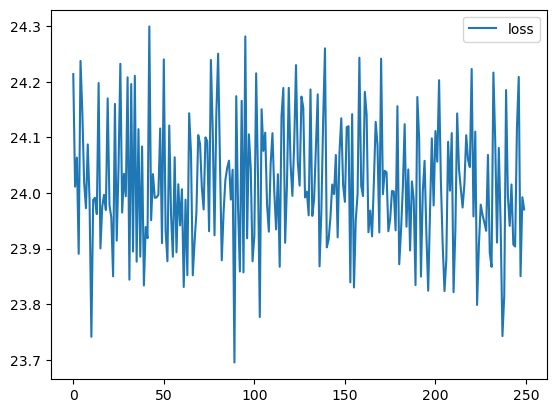

In [29]:
loss_df.plot()

In [30]:
model.evaluate(X_test, y_test, verbose=0)

25.66503143310547

In [31]:
model.evaluate(X_train, y_train, verbose=0)

23.886930465698242

In [32]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 384us/step


In [33]:
test_predictions

array([[405.8319 ],
       [624.4721 ],
       [593.0097 ],
       [573.0633 ],
       [367.0826 ],
       [580.0315 ],
       [515.7844 ],
       [459.74887],
       [550.0413 ],
       [448.14087],
       [612.6975 ],
       [549.75183],
       [419.66632],
       [409.4168 ],
       [652.2313 ],
       [437.90076],
       [509.1849 ],
       [660.9234 ],
       [663.58356],
       [566.3692 ],
       [334.63925],
       [445.44647],
       [383.02542],
       [379.25018],
       [567.4256 ],
       [611.49817],
       [533.15955],
       [428.4437 ],
       [656.43005],
       [414.64236],
       [443.24805],
       [485.81323],
       [439.01657],
       [682.8823 ],
       [425.33966],
       [418.24783],
       [502.65024],
       [551.2782 ],
       [510.4574 ],
       [395.87524],
       [619.5168 ],
       [417.19318],
       [605.3494 ],
       [446.58014],
       [502.70447],
       [582.5816 ],
       [670.02106],
       [491.10037],
       [318.96954],
       [486.11252],


In [34]:

test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      405.831909
1      624.472107
2      593.009705
3      573.063293
4      367.082611
          ...    
295    529.805420
296    516.059082
297    610.560120
298    417.521362
299    411.425323
Length: 300, dtype: float32

In [43]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [44]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [45]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

pred_df

,Test True Y,0
0,402.296319,405.831909
1,624.156198,624.472107
2,582.455066,593.009705
3,578.588606,573.063293
4,371.224104,367.082611
...,...,...
295,525.704657,529.805420
296,502.909473,516.059082
297,612.727910,610.560120
298,417.569725,417.521362


In [46]:
pred_df.columns = ['Test True Y', 'Model Predictions']

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

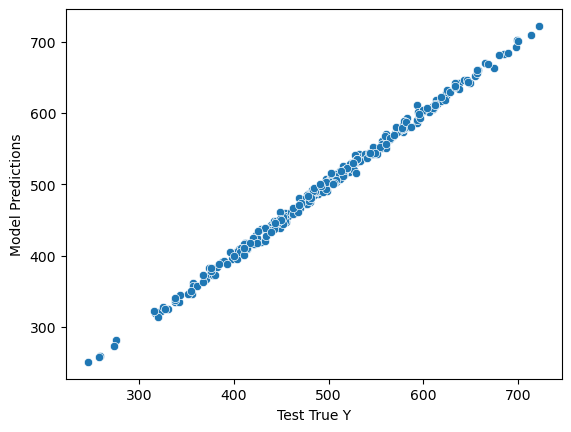

In [48]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [49]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.087069699482172

In [52]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [53]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.66503419125471

In [54]:
new_gem = [[998, 1000]]

In [56]:
new_gem = scaler.transform(new_gem)

In [57]:
model.predict(new_gem)

1/1 [==============================] - 0s 11ms/step


array([[420.2481]], dtype=float32)

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save('my_gem_model.h5')

In [60]:
later_model = load_model('my_gem_model.h5')

In [61]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 33ms/step


array([[420.2481]], dtype=float32)